In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading:  66%|██████▋   | 5.59M/8.41M [00:00<00:00, 23.8MB/s]

In [3]:
# Visit the Mars temp data mews site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
html_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|██████████| 8.41M/8.41M [00:10<00:00, 811kB/s] 


In [5]:
table = html_soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [1]:
import pandas as pd
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [2]:
new_mars_df = df[0]
new_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
new_mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [4]:
new_mars_df['terrestrial_date'] = pd.to_datetime(new_mars_df['terrestrial_date'])

In [5]:
new_mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
new_mars_df['ls'] = new_mars_df['ls'].astype(float)

In [7]:
new_mars_df.sort_values(by=['month'], ascending=False).head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
885,913,2015-05-07,978,338.0,12,-73.0,842.0
281,293,2013-07-09,328,348.0,12,-75.0,847.0
268,273,2013-06-25,315,341.0,12,-74.0,850.0
269,288,2013-06-26,316,341.0,12,-74.0,851.0
270,268,2013-06-27,317,342.0,12,-72.0,849.0
271,270,2013-06-28,318,342.0,12,-74.0,849.0
272,271,2013-06-29,319,343.0,12,-73.0,847.0
273,269,2013-06-30,320,344.0,12,-74.0,846.0
274,289,2013-07-01,321,344.0,12,-75.0,847.0
275,291,2013-07-02,322,345.0,12,-74.0,849.0


In [8]:
new_mars_df['terrestrial_date'].count()

1867

In [9]:
new_mars_df['min_temp'].mean()

-76.12104981253347

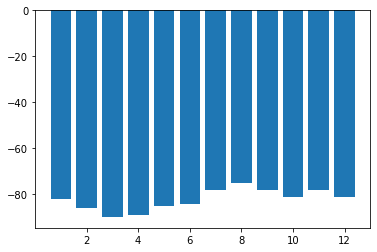

In [10]:
import matplotlib.pyplot as plt

plt.bar(new_mars_df['month'],new_mars_df['min_temp'])
plt.show()

In [11]:
new_mars_df['pressure'].mean()

841.0664167113016

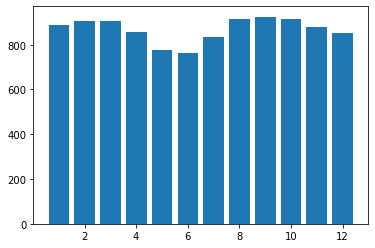

In [12]:
plt.bar(new_mars_df['month'],new_mars_df['pressure'])
plt.show()

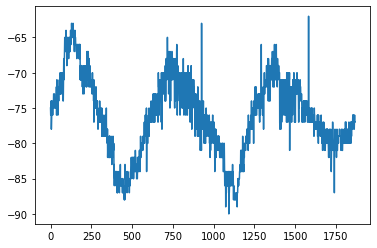

In [13]:
plt.plot(new_mars_df['min_temp'])
plt.show()

In [14]:
new_mars_df.to_csv('mars_temp_data.csv')

In [15]:
browser.quit()

NameError: name 'browser' is not defined